In [1]:
#import libraries
import cv2
import tensorflow as tf
import keras

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")
import pathlib

import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [2]:
#library to remove warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data set file
train_path = "seg_train"
test_path = "seg_test"

In [4]:
data_dir = pathlib.Path(train_path)
test_dir = pathlib.Path(test_path)

In [5]:
#set imade size(dimensions)
img_height=150
img_width=150
batch_size=64
SEED = 42

In [6]:
train_ds_pre = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    shuffle=True,
    seed=SEED,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)
val_ds_pre = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    labels='inferred',
    label_mode='int',
    seed = SEED,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


In [7]:
test_ds_pre = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 3000 files belonging to 6 classes.


In [8]:
def custom_preprocess_input(image, label):
    return image / 255.0, label 


train_ds = train_ds_pre.map(custom_preprocess_input)
val_ds = val_ds_pre.map(custom_preprocess_input)
test_ds = test_ds_pre.map(custom_preprocess_input)

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),

    layers.Dropout(0.5),  

    layers.Dense(512, activation='relu'),
    
    layers.Dropout(0.5),  
    
    layers.Dense(256, activation='relu'),
    
    layers.Dropout(0.5),  
    
    layers.Dense(128, activation='relu'),
    
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=10,         
    restore_best_weights=True  
)

In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  
    callbacks=[early_stopping]
)

Epoch 1/10
176/176 [==============================] - 330s 2s/step - loss: 1.2539 - accuracy: 0.4694 - val_loss: 1.0014 - val_accuracy: 0.5891
Epoch 2/10
176/176 [==============================] - 286s 2s/step - loss: 0.9343 - accuracy: 0.6253 - val_loss: 0.8289 - val_accuracy: 0.6679
Epoch 3/10
176/176 [==============================] - 779s 4s/step - loss: 0.7609 - accuracy: 0.7191 - val_loss: 1.0390 - val_accuracy: 0.5895
Epoch 4/10
176/176 [==============================] - 477s 3s/step - loss: 0.6718 - accuracy: 0.7563 - val_loss: 0.5417 - val_accuracy: 0.8093
Epoch 5/10
176/176 [==============================] - 318s 2s/step - loss: 0.5728 - accuracy: 0.7972 - val_loss: 0.5662 - val_accuracy: 0.7880
Epoch 6/10
176/176 [==============================] - 1966s 11s/step - loss: 0.5303 - accuracy: 0.8131 - val_loss: 0.5256 - val_accuracy: 0.8100
Epoch 7/10
176/176 [==============================] - 383s 2s/step - loss: 0.4830 - accuracy: 0.8255 - val_loss: 0.4703 - val_accuracy: 0.83

In [12]:
#to mesure loss and accuracy of the model
model.evaluate(test_ds)

47/47 [==============================] - 19s 388ms/step - loss: 0.4737 - accuracy: 0.8410


[0.47368329763412476, 0.8410000205039978]

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

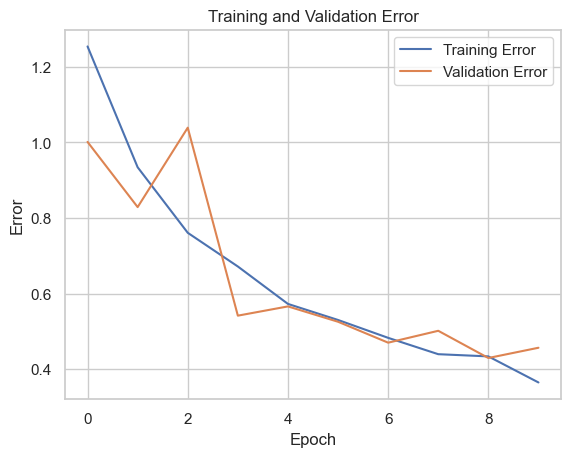

In [14]:
#ploting traning and validation graph
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.title('Training and Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
# Load the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

# Preprocess the test dataset
test_ds = test_ds.map(custom_preprocess_input)

# Make predictions on the test dataset
predictions = model.predict(test_ds)

# Since your model outputs probabilities for each class, you might want to convert them to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels of the test dataset
true_labels = np.concatenate([y for x, y in test_ds], axis=0)


Found 3000 files belonging to 6 classes.
47/47 [==============================] - 16s 315ms/step


In [ ]:
# Calculate class-wise accuracy
class_accuracies = {}
for class_label in range(6):  # Assuming you have 6 classes
    # Find indices where the true label matches the current class
    class_indices = np.where(true_labels == class_label)[0]
    
    if len(class_indices) > 0:
        # Extract predicted labels for the current class
        class_predicted_labels = predicted_labels[class_indices]
        
        # Calculate accuracy for the current class
        class_accuracy = np.mean(class_predicted_labels == class_label)
    else:
        # If there are no instances of the class in the test dataset, set accuracy to 0
        class_accuracy = 0.0
    
    # Store class-wise accuracy
    class_accuracies[class_label] = class_accuracy

# Print class-wise accuracies
for class_label, accuracy in class_accuracies.items():
    print(f"Class {class_label} Accuracy: {accuracy}")


Class 0 Accuracy: 0.8695652173913043
Class 1 Accuracy: 0.9789029535864979
Class 2 Accuracy: 0.7540687160940326
Class 3 Accuracy: 0.8285714285714286
Class 4 Accuracy: 0.8019607843137255
Class 5 Accuracy: 0.8343313373253493


In [ ]:
#######################################prediction of the model###############################################################

In [ ]:
model.save_weights("eg-1")

In [ ]:
model2 = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    

    layers.Flatten(),
    

    layers.Dropout(0.5),  
    

    layers.Dense(512, activation='relu'),
    

    layers.Dropout(0.5),  
    

    layers.Dense(256, activation='relu'),
    

    layers.Dropout(0.5),  
    

    layers.Dense(128, activation='relu'),
    

    layers.Dense(6, activation='softmax')
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model2.predict(np.ones((64,150,150,3)))

2/2 [==============================] - 1s 172ms/step


array([[0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0.16103262, 0.1771277 , 0.17432606, 0.17050296,
        0.15076604],
       [0.16624455, 0

In [ ]:
model2.load_weights("eg-1", skip_mismatch=False)

In [ ]:
model2.evaluate(test_ds)

47/47 [==============================] - 16s 320ms/step - loss: 0.4737 - accuracy: 0.8410


[0.47368329763412476, 0.8410000205039978]

In [ ]:

all_images = []
all_labels = []


for images, labels in test_ds:
    all_images.append(images.numpy())
    all_labels.append(labels.numpy())


all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)


In [ ]:
predictions = model.predict(all_images)
predicted_classes = np.argmax(predictions, axis=1)
predicted_probs = np.max(predictions, axis=1)

94/94 [==============================] - 17s 159ms/step


In [ ]:
predictions

array([[9.9560428e-01, 5.1668580e-06, 1.8543658e-04, 3.5706817e-05,
        1.6776446e-03, 2.4919116e-03],
       [8.7667137e-01, 1.2694813e-04, 2.5851864e-04, 4.5759552e-05,
        3.1698862e-04, 1.2258038e-01],
       [8.2719600e-01, 4.0229817e-05, 9.7577431e-05, 8.6633645e-06,
        1.8003413e-04, 1.7247744e-01],
       ...,
       [4.4727754e-03, 1.0323525e-02, 2.6247052e-02, 8.9309621e-01,
        6.5351501e-02, 5.0895795e-04],
       [9.6308136e-01, 2.8108716e-05, 1.6034517e-04, 2.5584566e-05,
        7.7281176e-04, 3.5931703e-02],
       [1.0590745e-03, 6.2528683e-04, 1.9147008e-04, 4.9604364e-07,
        1.0497284e-05, 9.9811316e-01]], dtype=float32)

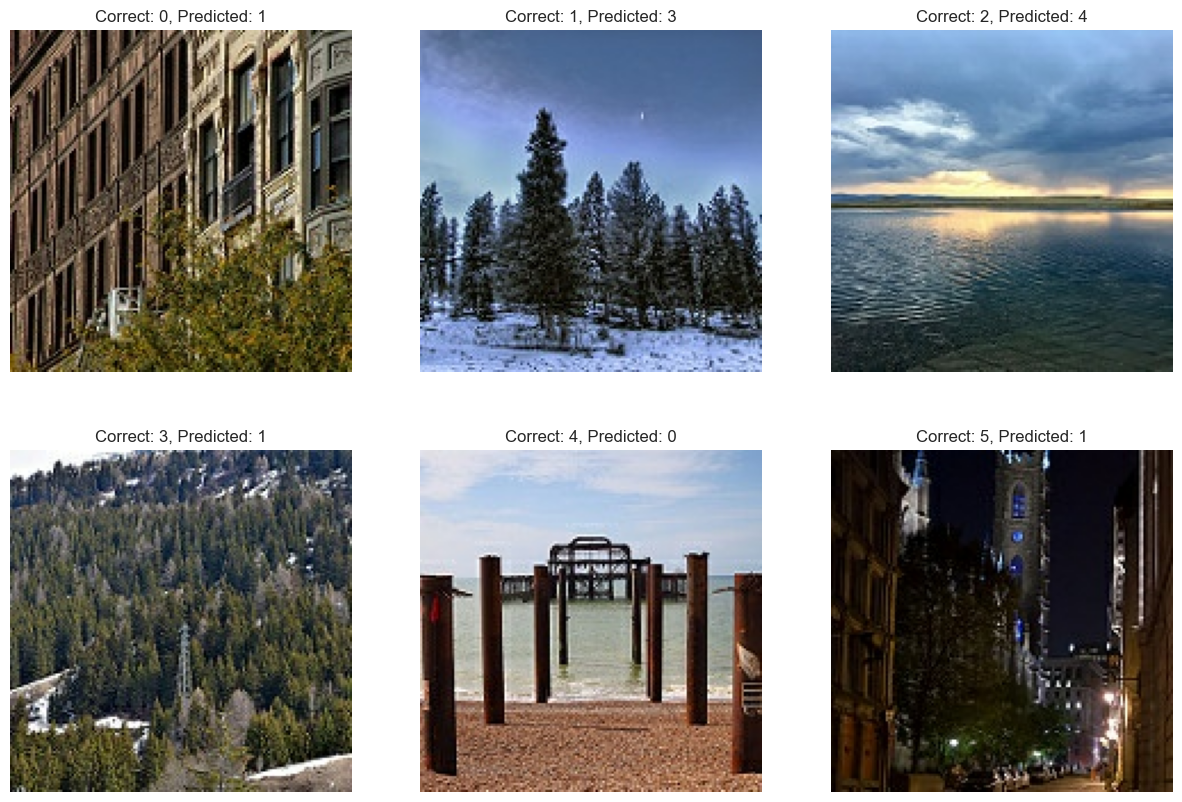

In [ ]:
worst_examples = []

for i in range(6):  
    class_indices = np.where(all_labels == i)[0]  
    worst_diff = -np.inf
    worst_index = None
    for index in class_indices:
        if predicted_classes[index] != i:  
            diff = predicted_probs[index] - predictions[index, i]
            if diff > worst_diff:
                worst_diff = diff
                worst_index = index
    if worst_index is not None:
        worst_examples.append((worst_index, i, predicted_classes[worst_index]))
####
plt.figure(figsize=(15, 10))
for i, (index, true_label, pred_label) in enumerate(worst_examples, 1):
    plt.subplot(2, 3, i)
    plt.imshow((all_images[index]*255).astype("uint8"))#if not mutiply 255, every pic is black
    plt.title(f"Correct: {true_label}, Predicted: {pred_label}")
    plt.axis("off")
plt.show()